In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

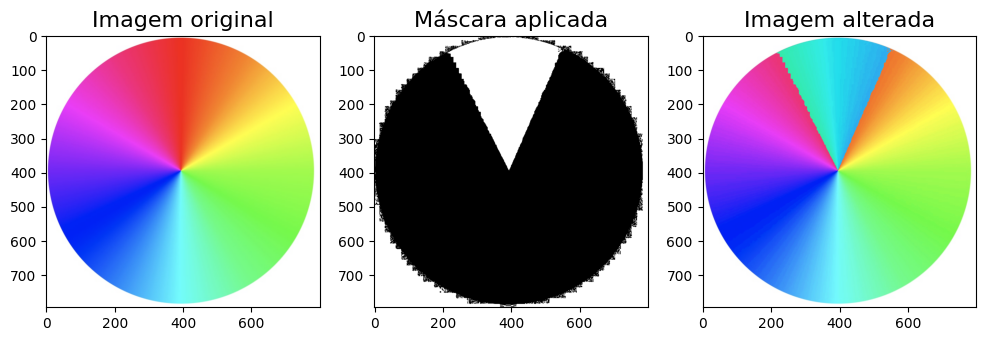

In [15]:
m = 0
x = 20

image_original = cv2.imread("circulo_cromatico.jpeg")

# converte a imagem original para HSV
image_hsv = cv2.cvtColor(image_original, cv2.COLOR_BGR2HSV)

# faz o cálculo dos limites superiores e inferiores
# com base em 180 por aspectos da biblioteca cv2
limite_superior = ((m + x) / 2) % 180
limite_inferior = ((m - x) / 2) % 180
# cria matrizes booleanas de acordo com as condições
# separa as matizes h, s e v
h = image_hsv[:, :, 0]
s = image_hsv[:, :, 1]
v = image_hsv[:, :, 2]
# de começo e fim do círculo HSV delimitado pelos parâmetros
inicio = h >= limite_inferior
final = h <= limite_superior
# realiza o casting para o tipo np.uint16
h = h.astype(np.uint16)
# delimita qual operação será usada dependendo da 
# condição de que o limite inferior é menor do que 
# o limite superior 
operacao = inicio & final if limite_inferior < limite_superior else inicio | final
# realiza a operação (podendo ser união ou interseção)
h[operacao] = np.mod(h[operacao] + 90, 180).astype(np.uint8)
# volta para o valor normal
h = h.astype(np.uint8)
# após realizar as modificações, realiza o merge na imagem
image_hsv = cv2.merge([h, s, v])
# converte a imagem de volta para RGB
image_final = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
# mostra a imagem
plt.figure(figsize=((12, 6)))
plt.subplot(1, 3, 1)
plt.title("Imagem original", fontsize=16)
plt.imshow(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(operacao, cmap='binary_r')  
plt.title("Máscara aplicada", fontsize=16)
plt.subplot(1, 3, 3)
plt.imshow(image_final)
plt.title("Imagem alterada", fontsize=16)

plt.show()

In [33]:
def alteracaoHue(path, m, x):
    image_original = cv2.imread(path)

    # converte a imagem original para HSV
    image_hsv = cv2.cvtColor(image_original, cv2.COLOR_BGR2HSV)
    
    # faz o cálculo dos limites superiores e inferiores
    # com base em 180 por aspectos da biblioteca cv2
    limite_superior = ((m + x) / 2) % 180
    limite_inferior = ((m - x) / 2) % 180
    # cria matrizes booleanas de acordo com as condições

    # separa as matizes h, s e v
    h = image_hsv[:, :, 0]
    s = image_hsv[:, :, 1]
    v = image_hsv[:, :, 2]

    # de começo e fim do círculo HSV delimitado pelos parâmetros
    inicio = h >= limite_inferior
    final = h <= limite_superior

    # realiza o casting para o tipo np.uint16
    h = h.astype(np.uint16)

    # delimita qual operação será usada dependendo da 
    # condição de que o limite inferior é menor do que 
    # o limite superior 
    operacao = inicio & final if limite_inferior < limite_superior else inicio | final
    # realiza a operação (podendo ser união ou interseção)
    h[operacao] = np.mod(h[operacao] + 90, 180).astype(np.uint8)

    # volta para o valor normal
    h = h.astype(np.uint8)

    # após realizar as modificações, realiza o merge na imagem
    image_hsv = cv2.merge([h, s, v])

    # converte a imagem de volta para RGB
    image_final = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

    # mostra a imagem
    plt.figure(figsize=((12, 6)))
    plt.subplot(1, 3, 1)
    plt.title("Imagem original", fontsize=16)
    plt.imshow(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(operacao, cmap='binary_r')  
    plt.axis('off')
    plt.title("Máscara aplicada", fontsize=16)
    plt.subplot(1, 3, 3)
    plt.imshow(image_final)
    plt.axis('off')
    plt.title("Imagem alterada", fontsize=16)

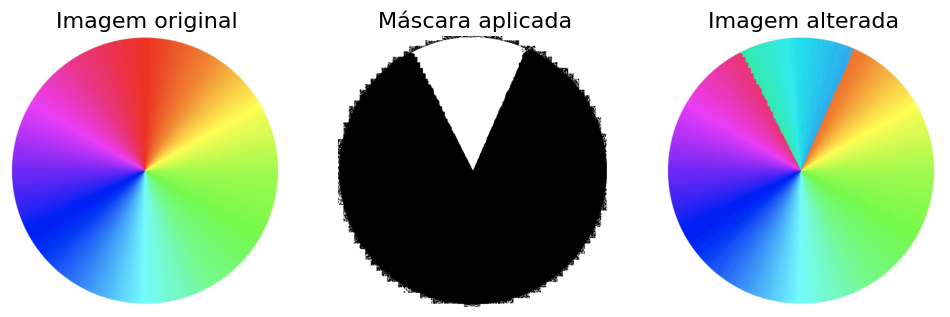

In [34]:
alteracaoHue('./circulo_cromatico.jpeg', 0, 20)

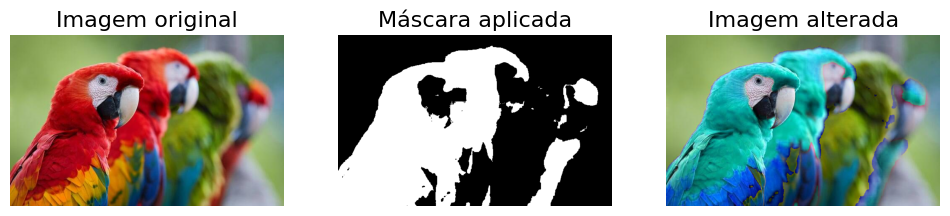

In [35]:
alteracaoHue('./aves.jpg', 20, 38)

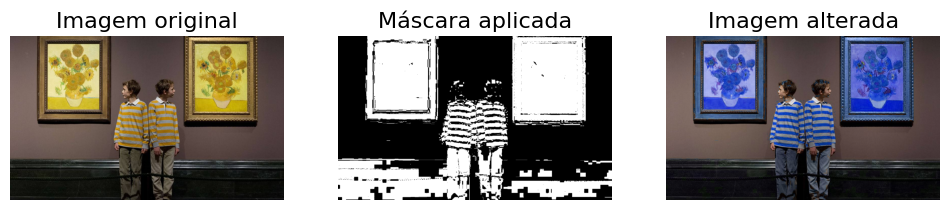

In [36]:
alteracaoHue('./girasois.jpg', 60, 30)

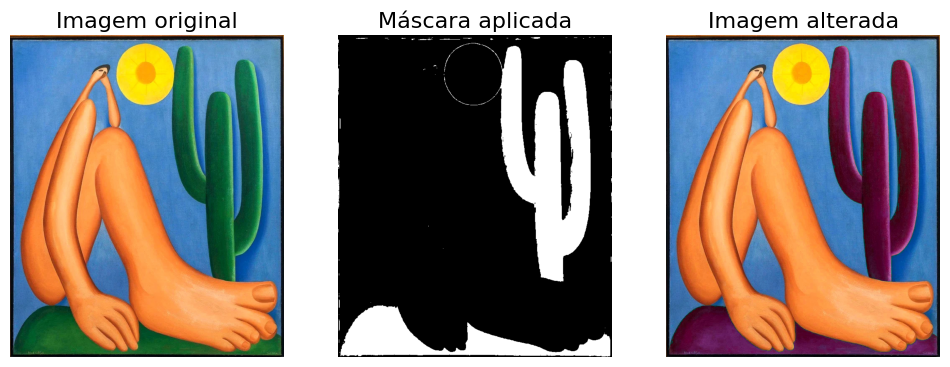

In [37]:
alteracaoHue('./abaporu.jpg', 120, 50)

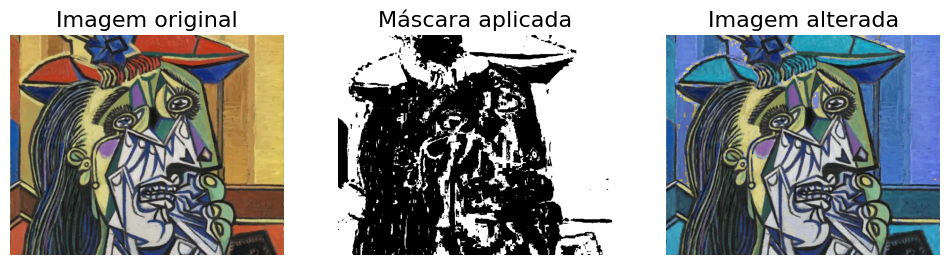

In [38]:
alteracaoHue('./mulher_chorando.jpg', 0, 50)

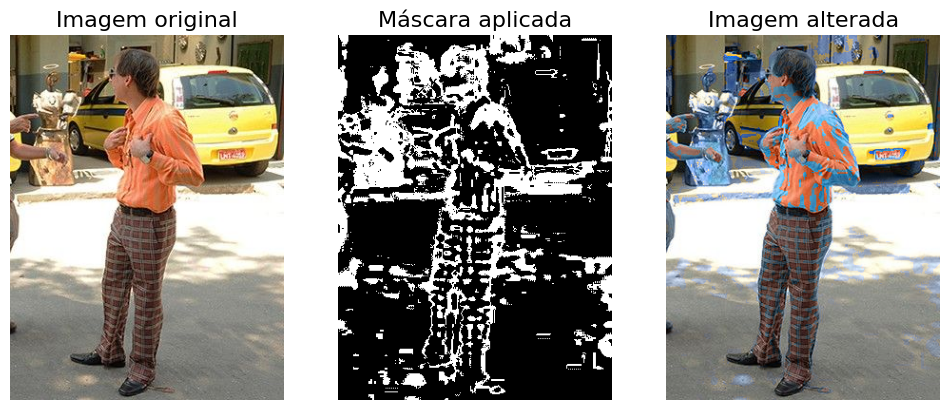

In [39]:
alteracaoHue('./carara.jpg', 30, 10)